In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
# OpenWeatherMap API Key
api_key = "924783bda048569443e49dd6a03e5591"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=atuona
Processing Record 2 of Set 1 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=clyde%20river
Processing Record 3 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ushuaia
Processing Record 4 of Set 1 | paka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=paka
Processing Record 5 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dikson
Processing Record 6 of Set 1 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=komsomolskiy
Processing Record 7 of Set 1 |

Processing Record 3 of Set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yellowknife
Processing Record 4 of Set 2 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=karaul
City not found. Skipping...
Processing Record 5 of Set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=chokurdakh
Processing Record 6 of Set 2 | westpunt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=westpunt
City not found. Skipping...
Processing Record 7 of Set 2 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=comodoro%20rivadavia
Processing Record 8 of Set 2 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cherskiy
Proc

Processing Record 6 of Set 3 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=port%20alfred
Processing Record 7 of Set 3 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=egvekinot
Processing Record 8 of Set 3 | dibaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dibaya
City not found. Skipping...
Processing Record 9 of Set 3 | baltasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=baltasi
Processing Record 10 of Set 3 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=umzimvubu
City not found. Skipping...
Processing Record 11 of Set 3 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saldanha
Processing Record 12 of 

Processing Record 8 of Set 4 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=jamestown
Processing Record 9 of Set 4 | milingimbi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=milingimbi
City not found. Skipping...
Processing Record 10 of Set 4 | neiafu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=neiafu
Processing Record 11 of Set 4 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=thompson
Processing Record 12 of Set 4 | stavyshche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=stavyshche
Processing Record 13 of Set 4 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=castro
Processing Record 14 of Set 4 | upernavik
http://api.o

Processing Record 11 of Set 5 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dicabisagan
Processing Record 12 of Set 5 | kharp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kharp
Processing Record 13 of Set 5 | skegness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=skegness
Processing Record 14 of Set 5 | saint-paul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=saint-paul
Processing Record 15 of Set 5 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vaitupu
City not found. Skipping...
Processing Record 16 of Set 5 | malakal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=malakal
City not found. Skipping...
Processing Record 17 of Se

Processing Record 13 of Set 6 | pechenga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=pechenga
Processing Record 14 of Set 6 | gazanjyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=gazanjyk
Processing Record 15 of Set 6 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ucluelet
Processing Record 16 of Set 6 | vuktyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vuktyl
Processing Record 17 of Set 6 | goundi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=goundi
Processing Record 18 of Set 6 | yagodnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yagodnoye
Processing Record 19 of Set 6 | riacho de santana
http://api.openweathermap.org/data/2.5

City not found. Skipping...
Processing Record 16 of Set 7 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=college
Processing Record 17 of Set 7 | nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=nome
Processing Record 18 of Set 7 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=caravelas
Processing Record 19 of Set 7 | vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=vaitape
Processing Record 20 of Set 7 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=georgetown
Processing Record 21 of Set 7 | tasbuget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tasbuget
City not found. Skipping...
Processing Record 22 of Set 7 | 

Processing Record 18 of Set 8 | lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lima
Processing Record 19 of Set 8 | santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=santa%20isabel%20do%20rio%20negro
Processing Record 20 of Set 8 | beisfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=beisfjord
Processing Record 21 of Set 8 | ardmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ardmore
Processing Record 22 of Set 8 | makushino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=makushino
Processing Record 23 of Set 8 | yaan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yaan
Processing Record 24 of Set 8 | lorengau
http://api.op

Processing Record 22 of Set 9 | iskateley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=iskateley
Processing Record 23 of Set 9 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=alice%20springs
Processing Record 24 of Set 9 | armacao dos buzios
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=armacao%20dos%20buzios
City not found. Skipping...
Processing Record 25 of Set 9 | fundao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=fundao
Processing Record 26 of Set 9 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=dingle
Processing Record 27 of Set 9 | yomitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=yomitan
City not found. Skipping..

Processing Record 24 of Set 10 | emden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=emden
Processing Record 25 of Set 10 | caceres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=caceres
Processing Record 26 of Set 10 | bolshevik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=bolshevik
Processing Record 27 of Set 10 | ocean city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=ocean%20city
Processing Record 28 of Set 10 | lao cai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lao%20cai
Processing Record 29 of Set 10 | kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=kawalu
Processing Record 30 of Set 10 | mazagao
http://api.openweathermap.org/data/2.5/

Processing Record 28 of Set 11 | sokoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=sokoni
Processing Record 29 of Set 11 | shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=shingu
Processing Record 30 of Set 11 | lar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=lar
Processing Record 31 of Set 11 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=tabiauea
City not found. Skipping...
Processing Record 32 of Set 11 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=rio%20gallegos
Processing Record 33 of Set 11 | biloela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=biloela
Processing Record 34 of Set 11 | pinheiro machado
http://a

Processing Record 32 of Set 12 | cabildo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=cabildo
Processing Record 33 of Set 12 | hayden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=hayden
Processing Record 34 of Set 12 | elat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=elat
Processing Record 35 of Set 12 | new milford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=new%20milford
Processing Record 36 of Set 12 | taormina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=taormina
Processing Record 37 of Set 12 | maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=924783bda048569443e49dd6a03e5591&q=maceio
Processing Record 38 of Set 12 | cabedelo
http://api.openweathermap.org/data/2.5/weath

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,48,PF,1533741670,100,-9.80,-139.03,79.52,21.97
1,clyde river,40,CA,1533740400,66,70.47,-68.59,48.20,5.82
2,ushuaia,40,AR,1533736800,60,-54.81,-68.31,41.00,23.04
3,paka,0,HR,1533740400,45,45.29,18.06,87.80,6.93
4,dikson,56,RU,1533741670,73,73.51,80.55,52.25,17.83


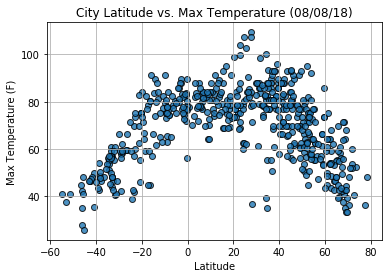

In [6]:
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()


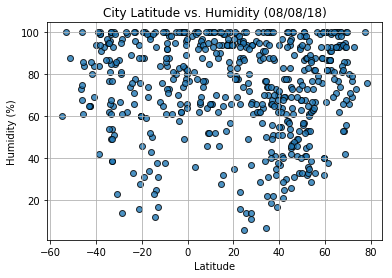

In [7]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

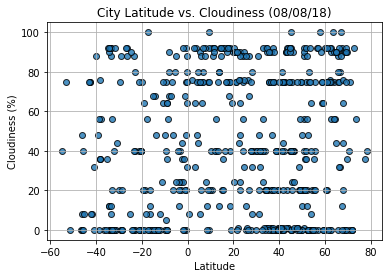

In [8]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

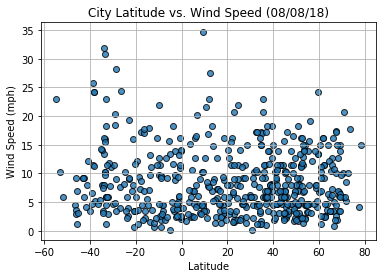

In [9]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

ValueError: x and y must be the same size

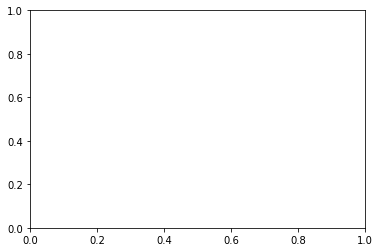

In [12]:
# Build the scatter plots for each city types
plt.scatter(lats, 
            lngs,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City lonitude vs. latitude (%s)" % time.strftime("%x"))
plt.ylabel("latitude")
plt.xlabel("lonitude")
plt.grid(True)

# Save the figure
plt.savefig("ploting_graph_of_cities.png")

# Show plot
plt.show()